In [1]:
import os
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import time

In [2]:
directory = 'traffic_data'

In [3]:
start = time.time()
files = glob.glob(directory + '/*.txt')
column_names = ['squared_id', 'timeinterval', 'internet_traffic']

dfs = []

# Iterate over the list of files
for file in files:
    # Read each file into a DataFrame
    df = pd.read_csv(file, sep='\t', usecols=[0, 1, 7], names=column_names)
    df.dropna(subset=['internet_traffic'], inplace=True)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df_final = pd.concat(dfs, ignore_index=True)
end = time.time()
print(end - start)

269.30667877197266


if you need df_final.csv I can share it to you via google drive

In [ ]:
df_final = pd.read_csv('/content/drive/My Drive/df_final.csv')

In [8]:
nan_count = df_final['internet_traffic'].isna().sum()

print('Number of NaN values in the internet_traffic column:', nan_count)

Number of NaN values in the internet_traffic column: 0


In [592]:
summed_df = df_final.groupby('squared_id')['internet_traffic'].sum().reset_index()
max_traffic_index = summed_df['internet_traffic'].idxmax()

# Extract the 'squared_id' with the highest total traffic
area_id_with_max_traffic = summed_df.loc[max_traffic_index, 'squared_id']

print("The squared_id with the highest total traffic is:", area_id_with_max_traffic)

The squared_id with the highest total traffic is: 5161


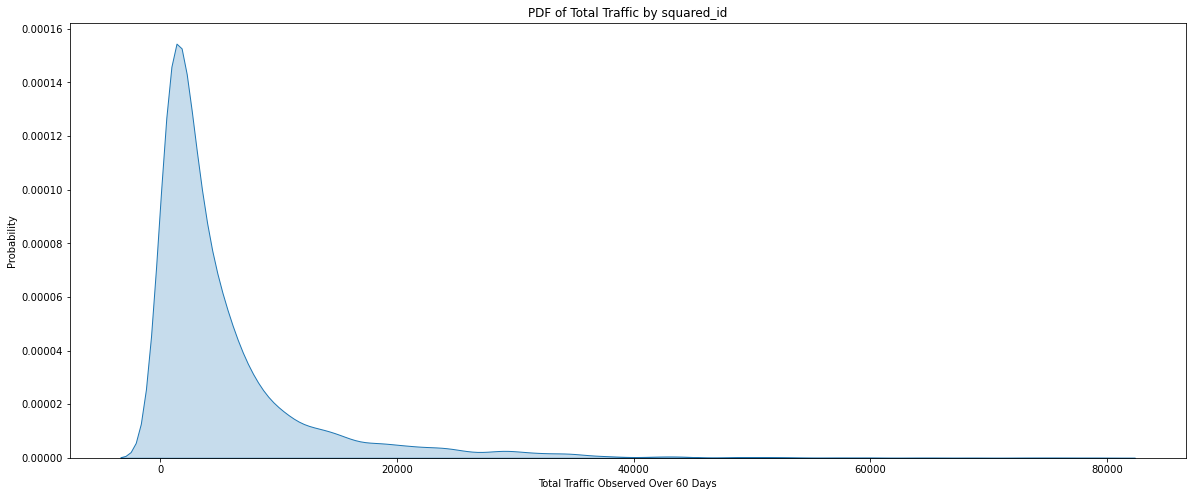

In [31]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Plotting the KDE
sns.kdeplot(summed_df['internet_traffic'], shade=True)

# Setting axes labels
plt.xlabel('Total Traffic Observed Over 60 Days')
plt.ylabel('Probability')

# Setting the title
plt.title('PDF of Total Traffic by squared_id')
#plt.xlim(-0.08e7, 1e7) # Adjust the x-axis limits as needed
#plt.ylim(0, 1.5e-6) # Adjust the y-axis limits as needed

# Applying a logarithmic scale to the y-axis
# Displaying the plot
plt.show()

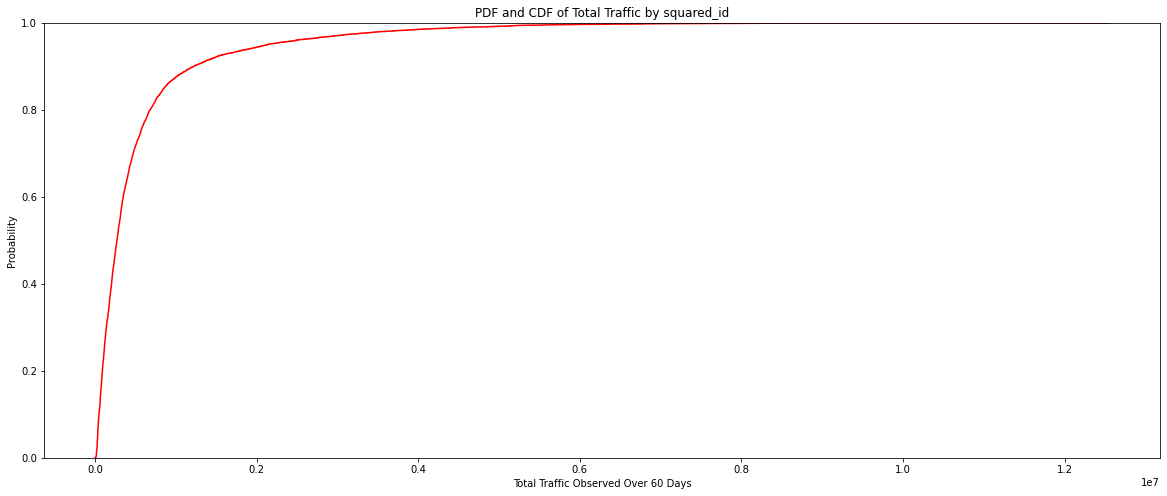

In [593]:
plt.figure(figsize=(20,8))

# Plotting the CDF
sns.ecdfplot(summed_df['internet_traffic'], linestyle="-", color="red")

# Setting axes labels
plt.xlabel('Total Traffic Observed Over 60 Days')
plt.ylabel('Probability')

# Setting the title
plt.title('PDF and CDF of Total Traffic by squared_id')

# Applying a logarithmic scale to the y-axis
# Displaying the plot
plt.show()

saving the records for two week with the time order then plot it
* it may need to convert time data to better form
*aggregate internet traffic data by time intervals (e.g., hourly, daily) and then sum the traffic values for each interval

In [594]:
##time series for the region with highest traffic
df_final['timeinterval'] = pd.to_datetime(df_final['timeinterval'], unit='ms')
## extracting 2 weeks for the highest traffic area
df_t1 = df_final[df_final['squared_id'] == area_id_with_max_traffic]
df_t1 = df_t1.sort_values('timeinterval')
start_date = datetime(2013, 11, 1) 
end_date = start_date + timedelta(weeks=2)
df_t1 = df_t1[(df_t1['timeinterval'] >= start_date) & (df_t1['timeinterval'] < end_date)]

df_t1.shape

(17693, 3)

In [595]:
def plot_traffic(signal, area_id):
    title = f"Internet traffic for the region with {area_id} id"
    fig = px.line(signal, x='timeinterval', y='internet_traffic', title=title)
    fig.update_layout(xaxis_title='Date', yaxis_title='Internet Traffic')
    fig.update_xaxes(rangeslider_visible=True)
    # Show the plot
    fig.show()


In [596]:
traffic_df = df_t1.groupby(by=["timeinterval"], axis=0).sum()

traffic_df.reset_index(inplace=True)

plot_traffic(traffic_df,area_id_with_max_traffic)

In [13]:
## extracting 2 weeks for the area_id equal =4159 and 4556 consumption traffic area
df_t2 = df_final[df_final['squared_id'] == 4159]
df_t3 = df_final[df_final['squared_id'] == 4556]
df_t2 = df_t2.sort_values('timeinterval')
df_t3 = df_t3.sort_values('timeinterval')
df_t2 = df_t2[(df_t2['timeinterval'] >= start_date) & (df_t2['timeinterval'] < end_date)]
df_t3 = df_t3[(df_t3['timeinterval'] >= start_date) & (df_t3['timeinterval'] < end_date)]

In [588]:
traffic_df2 = df_t2.groupby('timeinterval').agg({'internet_traffic': 'sum', 'squared_id': 'first'}).reset_index()

traffic_df2.reset_index(inplace=True)

plot_traffic(traffic_df2,4159)

In [589]:
traffic_df3 = df_t3.groupby(by=["timeinterval"], axis=0).sum()

traffic_df3.reset_index(inplace=True)
plot_traffic(traffic_df3,4556)

# Coding for task 2 question

In [37]:
import torch
pt_version = torch.__version__
print(pt_version)
from bigdl.chronos.data import TSDataset


2.2.2+cpu


In [38]:
import numpy as np

In [15]:
np.__version__

'1.23.5'

In [62]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
from sklearn.metrics import mean_squared_error


<ipython-input-62-8a042e97950a>:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



determing time for training and test set 

In [229]:
training_start_date = datetime(2013, 11, 1) # Assuming the year is 2023
training_end_date = datetime(2013,12,16)


df_training = df_final[(df_final['timeinterval'] >= training_start_date) & (df_final['timeinterval'] < training_end_date)]
df_training.reset_index(inplace=True)
df_training = df_training.groupby(['timeinterval', 'squared_id']).agg({'internet_traffic': 'sum'}).reset_index()
#df_training.set_index('timeinterval').resample('2s').sum().reset_index()


test_start_date = datetime(2013, 12, 16) # Assuming the year is 2023
test_end_date = datetime(2013,12,22)
df_test = df_final[(df_final['timeinterval'] >= test_start_date) & (df_final['timeinterval'] < test_end_date)]
df_test.reset_index(inplace=True)
df_test = df_test.groupby(['timeinterval', 'squared_id']).agg({'internet_traffic': 'sum'}).reset_index()



In [204]:
def plot_traffic(signal, area_id):
    title = f"Internet traffic for the region with {area_id} id"
    fig = px.line(signal, x='timeinterval', y='internet_traffic', title=title)
    fig.update_layout(xaxis_title='Date', yaxis_title='Internet Traffic')
    fig.update_xaxes(rangeslider_visible=True)
    # Show the plot
    fig.show()


In [205]:
def convert2timesries(my_dataframe):
    timeSeries = my_dataframe.loc[:, ["timeinterval","internet_traffic"]]
    timeSeries.index = timeSeries.timeinterval
    ts = timeSeries.drop("timeinterval",axis=1)
    return ts
    

In [602]:
tr_df_maxtr = df_training[df_training['squared_id'] == area_id_with_max_traffic]
tr_df_4556 = df_training[df_training['squared_id'] == 4556]
tr_df_4159 = df_training[df_training['squared_id'] == 4159]

test_df_maxtr = df_test[df_test['squared_id'] == area_id_with_max_traffic]
test_df_4556 = df_test[df_test['squared_id'] == 4556]
test_df_4159 = df_test[df_test['squared_id'] == 4159]

In [603]:
ts_max_tr = convert2timesries(tr_df_maxtr)
ts_4556_tr = convert2timesries(tr_df_4556)
ts_4159_tr = convert2timesries(tr_df_4159)

ts_test_maxtr = convert2timesries(test_df_maxtr)

In [604]:
ts_test_4556 = convert2timesries(test_df_4556)
ts_test_4159 = convert2timesries(test_df_4159)

In [605]:
plot_traffic(tr_df_maxtr, area_id_with_max_traffic)

In [606]:
plot_traffic(tr_df_4556, 4556)

In [607]:
plot_traffic(tr_df_4556, 4159)

# Checking whether the time series for desired area are stationary or not

1-Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
2-Second one is constant variance. It looks like constant. (yes stationary)
3-Third one is that If the test statistic is less than the critical value, we can say that time series is stationary.
So the Test static is less than Critical Values.
As a result, we sure that our time series is stationary

In [608]:
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    df_combined = pd.concat([ts, rolmean, rolstd], axis=1)
    df_combined.columns = ['Original', 'Rolling Mean', 'Rolling Std']

    # Create a Plotly figure
    fig = px.line(df_combined, x=df_combined.index, y=['Original', 'Rolling Mean', 'Rolling Std'],
                 labels={'x': 'Date', 'y': 'Internet_traffic'},
                 title='Rolling Mean & Standard Deviation')
    fig.update_xaxes(rangeslider_visible=True)
    # Customize the legend
    fig.update_layout(legend_title_text='Legend')

    # Show the plot
    fig.show()
  

In [609]:
  def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    


In [610]:
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_max_tr)

In [611]:
check_adfuller(ts_max_tr.internet_traffic)

Test statistic:  -16.62748028894508
p-value:  1.6772305321509425e-29
Critical Values: {'1%': -3.4313882425047266, '5%': -2.8619988117704067, '10%': -2.567014222472981}


In [612]:
check_adfuller(ts_4556_tr.internet_traffic)

Test statistic:  -14.873251699030035
p-value:  1.6511171615313415e-27
Critical Values: {'1%': -3.43138577575775, '5%': -2.861997721875349, '10%': -2.5670136422963123}


In [613]:
check_adfuller(ts_4159_tr.internet_traffic)

Test statistic:  -12.541351789488457
p-value:  2.3107969477441658e-23
Critical Values: {'1%': -3.4313882425047266, '5%': -2.8619988117704067, '10%': -2.567014222472981}


Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.
this is the thing that I do to avoid trend and seasonality problem

In [614]:
ts_diff = ts_max_tr - ts_max_tr.shift()
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.internet_traffic)

Test statistic:  -12.48746294357152
p-value:  2.9965016428409945e-23
Critical Values: {'1%': -3.431386925446054, '5%': -2.86199822984795, '10%': -2.567013912702007}


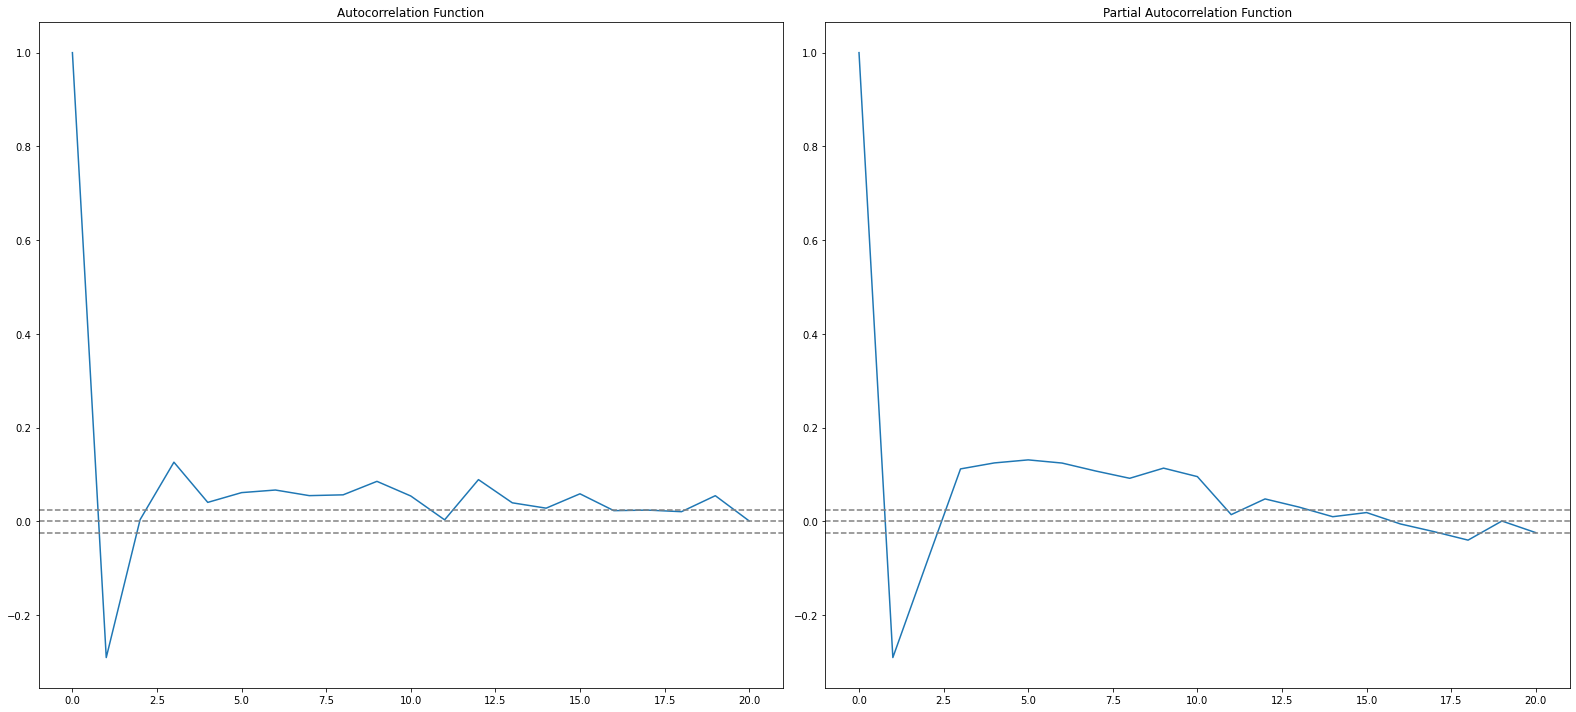

In [615]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [616]:
ts_max_tr.index = ts_max_tr.index.to_period('10T')
ts_max_tr

internet_traffic
timeinterval                      
2013-11-01 00:00        212.332776
2013-11-01 00:10        231.642547
2013-11-01 00:20        187.802066
2013-11-01 00:30        234.237396
2013-11-01 00:40        174.652642
...                            ...
2013-12-15 23:10        335.479360
2013-12-15 23:20        321.910818
2013-12-15 23:30        286.600021
2013-12-15 23:40        299.662213
2013-12-15 23:50        247.854510

[6336 rows x 1 columns]

In [617]:
ts_test_maxtr.index = ts_test_maxtr.index.to_period('10T')


In [618]:
ts_max_tr_lr = ts_max_tr.copy()
ts_test_maxtr_lr = ts_test_maxtr.copy()
ts_max_tr_lr['lag1'] = ts_max_tr['internet_traffic'].shift(3)
ts_test_maxtr_lr['lag1'] = ts_test_maxtr['internet_traffic'].shift(3)

In [619]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
X1 = ts_max_tr_lr.drop(columns= 'internet_traffic').dropna() # drop the main signal and shift the rest
y1 = ts_max_tr_lr.loc[:,'internet_traffic']
X2 = ts_test_maxtr_lr.drop(columns= 'internet_traffic').dropna()
y2 = ts_test_maxtr_lr.loc[:,'internet_traffic']


y1,X1 = y1.align(X1,join = 'inner')
y2,x2 = y2.align(X2,join = 'inner')
X_train = X1
y_train = y1
X_test = X2
y_test = y2
model = LinearRegression()
model.fit(X_train,y_train) # fit the model
y_pred = pd.Series(model.predict(X_test), index = X_test.index, name = 'Prediction') # Predict for test inputs
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 175.49860052028353
Mean Absolute Percentage Error: 0.192810600259938


The incorporation of lag features will inevitably lead to a delayed forecast in linear models, signifying that one would only comprehend a shift in data post-occurrence.

In [620]:
fig = go.Figure()

# Plot real data
fig.add_trace(go.Scatter(x=X_test.index.to_timestamp(), y=y_test, mode='lines', name='Real Data'))

# Plot predictions
fig.add_trace(go.Scatter(x=y_pred.index.to_timestamp(), y=y_pred, mode='lines', name='Predicted Data'))

# Update layout for better visualization
fig.update_layout(title='Visualising Signal and Prediction',
                  xaxis_title='Index',
                  yaxis_title='Value',
                  legend_title='Legend')

# Show the plot
fig.show()



In [621]:
ts_4556_tr.index = ts_4556_tr.index.to_period('10T')
ts_test_4556.index = ts_test_4556.index.to_period('10T')

In [622]:
ts_4159_tr.index = ts_4159_tr.index.to_period('10T')
ts_test_4159.index = ts_test_4159.index.to_period('10T')

In [623]:
ts_test_4556

internet_traffic
timeinterval                      
2013-12-16 00:00        363.630691
2013-12-16 00:10        333.025357
2013-12-16 00:20        327.302209
2013-12-16 00:30        361.399839
2013-12-16 00:40        353.885828
...                            ...
2013-12-21 23:10        728.852435
2013-12-21 23:20        728.208370
2013-12-21 23:30        754.797001
2013-12-21 23:40        708.345484
2013-12-21 23:50        783.117658

[864 rows x 1 columns]

In [624]:
ts_4556_tr_lr = ts_4556_tr.copy()
ts_test_4556_lr = ts_test_4556.copy()
ts_4556_tr_lr['lag1'] = ts_4556_tr_lr['internet_traffic'].shift(5)
ts_test_4556['lag1'] = ts_test_4556['internet_traffic'].shift(5)

In [625]:
ts_4159_tr_lr = ts_4159_tr.copy()
ts_test_4159_lr = ts_test_4159.copy()
ts_4159_tr_lr['lag1'] = ts_4159_tr_lr['internet_traffic'].shift(5)
ts_test_4159['lag1'] = ts_test_4159['internet_traffic'].shift(5)

In [626]:
X1 = ts_4556_tr_lr.drop(columns= 'internet_traffic').dropna() # drop the main signal and shift the rest
y1 = ts_4556_tr_lr.loc[:,'internet_traffic']
X2 = ts_test_4556.drop(columns= 'internet_traffic').dropna()
y2 = ts_test_4556.loc[:,'internet_traffic']


y1,X1 = y1.align(X1,join = 'inner')
y2,x2 = y2.align(X2,join = 'inner')
X_train = X1
y_train = y1
X_test = X2
y_test = y2
model = LinearRegression()
model.fit(X_train,y_train) # fit the model
y_pred = pd.Series(model.predict(X_test), index = X_test.index, name = 'Prediction') # Predict for test inputs
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 52.904618191580575
Mean Absolute Percentage Error: 0.13087245048925047


In [627]:
fig = go.Figure()

# Plot real data
fig.add_trace(go.Scatter(x=X_test.index.to_timestamp(), y=y_test, mode='lines', name='Real Data'))

# Plot predictions
fig.add_trace(go.Scatter(x=y_pred.index.to_timestamp(), y=y_pred, mode='lines', name='Predicted Data'))

# Update layout for better visualization
fig.update_layout(title='Visualising Signal and Prediction',
                  xaxis_title='Index',
                  yaxis_title='Value',
                  legend_title='Legend')

# Show the plot
fig.show()

In [628]:
X1 = ts_4159_tr_lr.drop(columns= 'internet_traffic').dropna() # drop the main signal and shift the rest
y1 = ts_4159_tr_lr.loc[:,'internet_traffic']
X2 = ts_test_4159.drop(columns= 'internet_traffic').dropna()
y2 = ts_test_4159.loc[:,'internet_traffic']


y1,X1 = y1.align(X1,join = 'inner')
y2,x2 = y2.align(X2,join = 'inner')
X_train = X1
y_train = y1
X_test = X2
y_test = y2
model = LinearRegression()
model.fit(X_train,y_train) # fit the model
y_pred = pd.Series(model.predict(X_test), index = X_test.index, name = 'Prediction') # Predict for test inputs
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 31.127336299289876
Mean Absolute Percentage Error: 0.13514698891468385


In [629]:
fig = go.Figure()

# Plot real data
fig.add_trace(go.Scatter(x=X_test.index.to_timestamp(), y=y_test, mode='lines', name='Real Data'))

# Plot predictions
fig.add_trace(go.Scatter(x=y_pred.index.to_timestamp(), y=y_pred, mode='lines', name='Predicted Data'))

# Update layout for better visualization
fig.update_layout(title='Visualising Signal and Prediction',
                  xaxis_title='Index',
                  yaxis_title='Value',
                  legend_title='Legend')

# Show the plot
fig.show()

By plotting the model's predictions, notice that it is simply the labels shifted right 10 minute

In [176]:

type(ts_max_tr)

pandas.core.frame.DataFrame

In [227]:
import IPython
import IPython.display

In [630]:
ts_training_4159 = df_training[df_training['squared_id'] ==4159]
ts_test_4159 = df_test[df_test['squared_id'] ==4159]

ts_training_5161 = df_training[df_training['squared_id'] ==5161]
ts_test_5161 = df_test[df_test['squared_id'] ==5161]

ts_training_4556 = df_training[df_training['squared_id'] ==4556]
ts_test_4556 = df_test[df_test['squared_id'] ==4556]


In [591]:
##return and make a function
def resampler(dataset):
    dataset['timeinterval'] = pd.to_datetime(dataset['timeinterval'])
    dataset.set_index('timeinterval', inplace=True)
    df_resampled = dataset.resample('180min').mean()
    df_resampled.reset_index(inplace=True)
    return df_resampled
    

In [348]:
ts_training_4159['timeinterval'] = pd.to_datetime(ts_training_4159['timeinterval'])

# Set 'timeinterval' as the index for ts_training_4159
ts_training_4159.set_index('timeinterval', inplace=True)

# Resample the data to every hour and calculate the mean
df_resampled = ts_training_4159.resample('180min').mean()

# Reset the index if you want 'timeinterval' back as a column
df_resampled.reset_index(inplace=True)

<ipython-input-348-23067e350608>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [349]:
ts_test_4159['timeinterval'] = pd.to_datetime(ts_test_4159['timeinterval'])

# Set 'timeinterval' as the index for ts_training_4159
ts_test_4159.set_index('timeinterval', inplace=True)

# Resample the data to every hour and calculate the mean
df_resampled1 = ts_test_4159.resample('120min').mean()

# Reset the index if you want 'timeinterval' back as a column
df_resampled1.reset_index(inplace=True)

<ipython-input-349-3239664c8e68>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [350]:
df_resampled
ts_training_4159 = convert2timesries(df_resampled)


internet_traffic
timeinterval                         
2013-11-01 00:00:00        194.896960
2013-11-01 03:00:00        152.823551
2013-11-01 06:00:00        134.956167
2013-11-01 09:00:00        164.721488
2013-11-01 12:00:00        167.168946
...                               ...
2013-12-15 09:00:00        164.347116
2013-12-15 12:00:00        186.624055
2013-12-15 15:00:00        198.764966
2013-12-15 18:00:00        194.268938
2013-12-15 21:00:00        173.408100

[360 rows x 1 columns]

In [351]:
ts_training_4159.dropna(subset=['internet_traffic'], inplace=True)

In [345]:
ts_training_4159['internet_traffic'] = ts_training_4159['internet_traffic'].fillna(method='ffill')
ts_training_4159

internet_traffic
timeinterval                         
2013-11-01 00:00:00        194.896960
2013-11-01 03:00:00        152.823551
2013-11-01 06:00:00        134.956167
2013-11-01 09:00:00        164.721488
2013-11-01 12:00:00        167.168946
...                               ...
2013-12-15 09:00:00        164.347116
2013-12-15 12:00:00        186.624055
2013-12-15 15:00:00        198.764966
2013-12-15 18:00:00        194.268938
2013-12-15 21:00:00        173.408100

[360 rows x 1 columns]

In [353]:
ts_test_4159 = convert2timesries(df_resampled1)


In [354]:
plot_traffic(df_resampled,4159)

In [355]:
timestamp_training_4159 = ts_training_4159.index.map(pd.Timestamp.timestamp)
timestamp_test_4159 = ts_test_4159.index.map(pd.Timestamp.timestamp)
timestamp_test_4159

Float64Index([1387152000.0, 1387159200.0, 1387166400.0, 1387173600.0,
              1387180800.0, 1387188000.0, 1387195200.0, 1387202400.0,
              1387209600.0, 1387216800.0, 1387224000.0, 1387231200.0,
              1387238400.0, 1387245600.0, 1387252800.0, 1387260000.0,
              1387267200.0, 1387274400.0, 1387281600.0, 1387288800.0,
              1387296000.0, 1387303200.0, 1387310400.0, 1387317600.0,
              1387324800.0, 1387332000.0, 1387339200.0, 1387346400.0,
              1387353600.0, 1387360800.0, 1387368000.0, 1387375200.0,
              1387382400.0, 1387389600.0, 1387396800.0, 1387404000.0,
              1387411200.0, 1387418400.0, 1387425600.0, 1387432800.0,
              1387440000.0, 1387447200.0, 1387454400.0, 1387461600.0,
              1387468800.0, 1387476000.0, 1387483200.0, 1387490400.0,
              1387497600.0, 1387504800.0, 1387512000.0, 1387519200.0,
              1387526400.0, 1387533600.0, 1387540800.0, 1387548000.0,
              138755

In [356]:
import tensorflow as tf

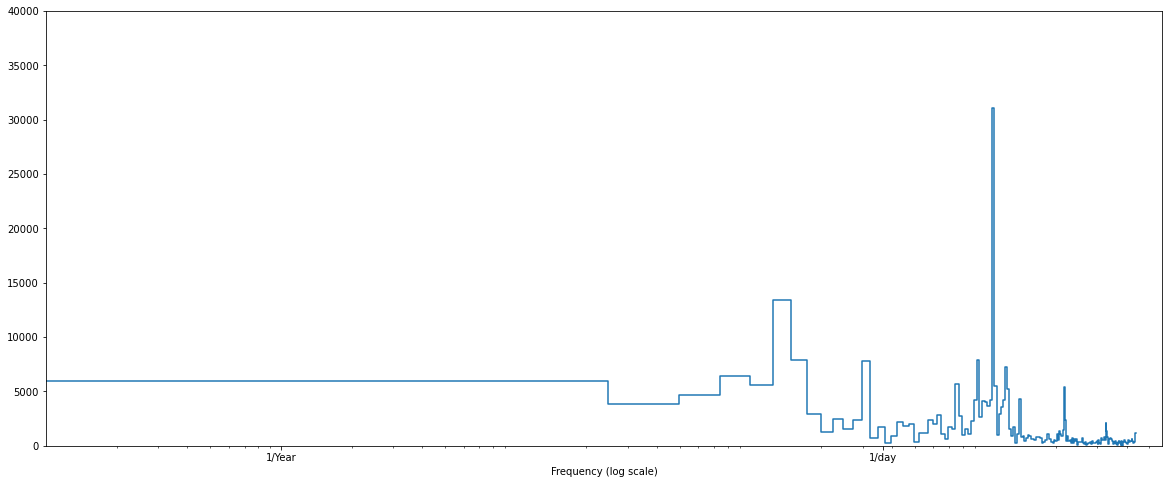

In [357]:
fft = tf.signal.rfft(ts_training_4159['internet_traffic'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(ts_training_4159['internet_traffic'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
f_per_year = f_per_dataset/years_per_dataset
# Create a Plotly figure
plt.figure(figsize =(20,8))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

it seem that we should downsample our data to each 3 hour intervals

In [431]:
column_indices = {name: i for i, name in enumerate(ts_training_4159.columns)}

n = len(ts_training_4159)
train_df = ts_training_4159[0:int(n*0.9)]
val_df = ts_training_4159[int(n*0.9):int(n)]
test_df = ts_test_4159

num_features = ts_training_4159.shape[1]
train_df

internet_traffic
timeinterval                         
2013-11-01 00:00:00        194.896960
2013-11-01 03:00:00        152.823551
2013-11-01 06:00:00        134.956167
2013-11-01 09:00:00        164.721488
2013-11-01 12:00:00        167.168946
...                               ...
2013-12-10 21:00:00        282.046036
2013-12-11 00:00:00        157.950184
2013-12-11 03:00:00        127.692135
2013-12-11 06:00:00        374.854630
2013-12-11 09:00:00        597.621050

[317 rows x 1 columns]

In [432]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

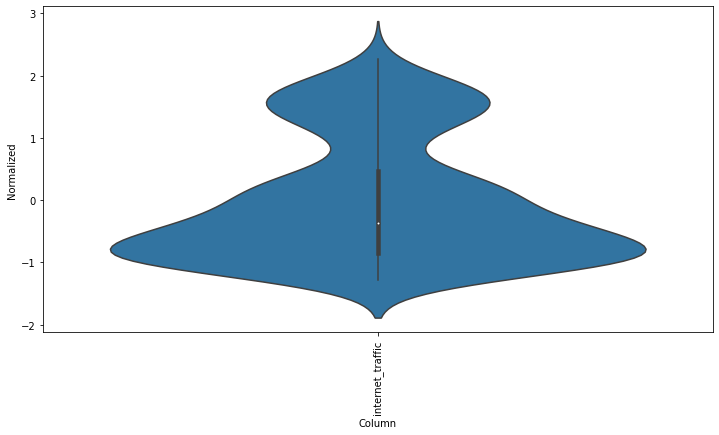

In [433]:
df_std = (ts_training_4159 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(ts_training_4159.keys(), rotation=90)

# Data Windowing

The main features of the input windows are:

*The width (number of time steps) of the input and label windows.
*The time offset between them.
*Which features are used as inputs, labels, or both

In [579]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels

In [580]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [581]:
from plotly.subplots import make_subplots
def plot(self, model=None, plot_col='internet_traffic', max_subplots=3):
    inputs, labels = self.example
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))

    # Create subplots
    fig = make_subplots(rows=max_n, cols=1)

    for n in range(max_n):
        # Plot inputs as lines
        fig.add_trace(go.Scatter(x=self.input_indices, y=inputs[n, :, plot_col_index],
                                 mode='lines', name='Inputs'), row=n+1, col=1)

        # Determine label column index
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is not None:
            # Plot labels as lines
            fig.add_trace(go.Scatter(x=self.label_indices, y=labels[n, :, label_col_index],
                                     mode='lines', name='Labels', line=dict(color='#2ca02c')), row=n+1, col=1)

            # Plot predictions as lines if model is provided
            if model is not None:
                predictions = model(inputs)
                fig.add_trace(go.Scatter(x=self.label_indices, y=predictions[n, :, label_col_index],
                                         mode='lines', name='Predictions', line=dict(color='#ff7f0e')), row=n+1, col=1)

        # Update y-axis label for each subplot
        fig.update_yaxes(title=f'{plot_col} [normed]', row=n+1, col=1)

    # Update x-axis label
    fig.update_xaxes(title='Time [h]')

    # Show the figure
    fig.show()

WindowGenerator.plot = plot

In [582]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=4)

  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [583]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [584]:
MAX_EPOCHS = 20


In [585]:
val_performance = {}
performance = {}

In [586]:
# maybe out step should be 1008
OUT_STEPS = 48
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

Total window size: 148
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147]
Label column name(s): None

In [552]:
multi_window.train.element_spec

(TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 48, 1), dtype=tf.float32, name=None))

In [553]:
for example_inputs, example_labels in multi_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (4, 100, 1)
Labels shape (batch, time, features): (4, 48, 1)


In [554]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

the number of unit should be equal or more than the number of steps that we want to predict

In [555]:
feedback_model = FeedBack(units=48, out_steps=OUT_STEPS)

The first method this model needs is a warmup method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history.

In [556]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [557]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([4, 1])

In [558]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [559]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (4, 48, 1)


In [560]:
multi_val_performance = {}
multi_performance = {}

In [561]:
feedback_model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
                 metrics=[tf.keras.metrics.MeanAbsoluteError(),
                           tf.keras.metrics.MeanAbsolutePercentageError()])

In [562]:
start = time.time()
history = feedback_model.fit(multi_window.train, epochs=MAX_EPOCHS,
                        validation_data=multi_window.val,)
end = time.time()
print("training time is =")
print(end - start)

Epoch 1/20
43/43 [==============================] - 45s 762ms/step - loss: 0.8172 - mean_absolute_error: 0.8172 - mean_absolute_percentage_error: 133.1269
Epoch 2/20
43/43 [==============================] - 34s 779ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 120.6857
Epoch 3/20
43/43 [==============================] - 33s 769ms/step - loss: 0.7348 - mean_absolute_error: 0.7348 - mean_absolute_percentage_error: 107.8549
Epoch 4/20
43/43 [==============================] - 33s 759ms/step - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_absolute_percentage_error: 112.6704
Epoch 5/20
43/43 [==============================] - 30s 695ms/step - loss: 0.7283 - mean_absolute_error: 0.7283 - mean_absolute_percentage_error: 106.7388
Epoch 6/20
43/43 [==============================] - 33s 758ms/step - loss: 0.7321 - mean_absolute_error: 0.7321 - mean_absolute_percentage_error: 111.8773
Epoch 7/20
43/43 [==============================] - 30s 698ms/step - l

In [569]:
multi_window.plot(feedback_model)